# Labolatorium 2
Zadania 1 i 2 są zaimplementowane w pliku lab2_first2.py
### Zadanie 1 - Algorytm Gaussa-Jordana

In [3]:
from lab2_first2 import gauss_solve
from lab2_first2 import lu_factor
import time
import numpy as np
import matplotlib.pyplot as plt

Porównanie czasu wykonania mojej implementacji i fuckcji bibliotecznej numpy.linalg.solve

In [5]:

random_matrix_sizes = [500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
my_func_times = []
lib_func_times = []
for i in random_matrix_sizes:
    print(i, end=" ")
    left = np.random.uniform(low=1.0, high = 1000.0, size=(i, i))
    right = np.random.uniform(low=1.0, high = 1000.0, size=(i,))

    start = time.process_time()
    sol1 = gauss_solve(left, right)
    my_end = time.process_time()
    sol2 = np.linalg.solve(left, right)
    np_end = time.process_time()

    my_func_times.append(my_end - start)
    lib_func_times.append(np_end - my_end)

500 750 1000 1500 2000 2500 3000 3500 4000 5000 

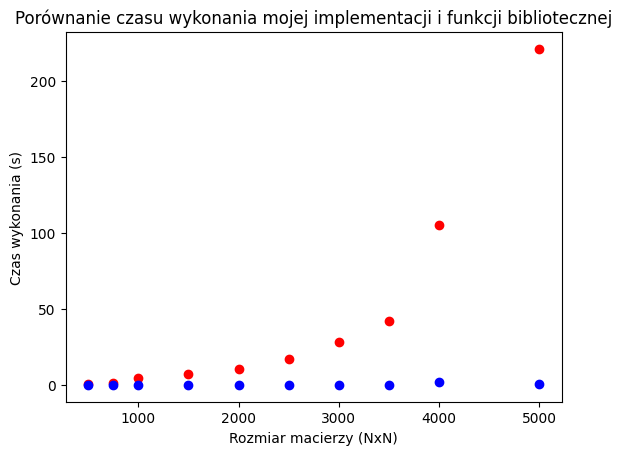

In [10]:
plt.plot(random_matrix_sizes, my_func_times, 'ro')
plt.plot(random_matrix_sizes, lib_func_times, 'bo')
plt.xlabel("Rozmiar macierzy (NxN)")
plt.ylabel("Czas wykonania (s)")
plt.title("Porównanie czasu wykonania mojej implementacji i funkcji bibliotecznej")
plt.show()

Jak widać moja implementacja jest wolniejsza od impelentacji bibliotecznej. Może być to związane że implementacja z biblioteki numpy kożysta z szybszego algorytmu lub fakt że ta fukcja jest napisana w języku C++ i przez bycie skompilowaną wcześniej zyskuje na wydajności.

### Zadanie 2 - Faktoryzacja LU

Sprawdzenie poprawności mojej implementacji przez sprawdzenie normy macieży $|A - LU|$.

In [14]:
for s in random_matrix_sizes:
    matrix = np.random.uniform(low=1.0, high = 1000.0, size=(s, s))
    copy = matrix.copy()
    LU = lu_factor(matrix)
    L = np.zeros(shape=LU.shape)
    U = np.zeros(shape=LU.shape)
    for i in range(LU.shape[0]):
        L[i,:i] = LU[i,:i]
        L[i,i] = 1
        U[i, i:] = LU[i, i:]
    print(s,np.linalg.matrix_norm(copy - np.matmul(L, U)))

500 6.144012080608352e-08
750 7.614729856608907e-07
1000 2.1140020348549448e-07
1500 1.3204252485672957e-06
2000 1.1251833205518289e-05
2500 3.61998900530579e-06
3000 3.062301478254872e-06
3500 6.627235636149727e-06
4000 6.060014156601309e-06
5000 0.00046898019903887054


Wszyskie normy są bliskie zeru czyli moja implementacja jest poprawna. Normy mogą być lekko różne od zera ponieważ przy takich rozmiarach macierzy błąd ze względu na arytmetykę zmiennoprzecinkową staje się większy.

### Zadanie 3 - Analiza obwodu elektrycznego

Założenia:
- W obwodzie nie istnieją przewody o zerowym oporze.
- Źródło napięcie nie posiada oporu wewnętrznego
- Napięcia mierzone są pod względem "minusa" podłączonego źródła napięcia

In [2]:
from wire_solve import solve_nodal_analisis
import wire_util as util
import networkx as nx
from importlib import reload
reload(util)

<module 'wire_util' from 'c:\\Users\\franc\\Documents\\Mowint\\wire_util.py'>

#### Grafy przykładowe

In [87]:
def create_brige_graph(n: int):
    A = nx.erdos_renyi_graph(n//2, 0.2)
    B = nx.erdos_renyi_graph(n//2, 0.2)
    merge = nx.Graph()
    for u, v in A.edges():
        r = np.random.binomial(99, 0.1) + 1
        merge.add_edge(u, v, resistance = r)
    for u, v in B.edges():
        r = np.random.binomial(99, 0.1) + 1
        merge.add_edge(u+n//2, v+n//2, resistance = r)
    merge.add_edge(4, 4+n//2, resistance = np.random.binomial(99, 0.1) + 1)
    return merge

def create_grid_graph(n: int):
    g = nx.grid_2d_graph(n, n)
    i = 0
    d = {}
    for u in g.nodes:
        d[u] = i
        i += 1
    inv = {v:k for k, v in d.items()}
    b = nx.Graph()
    for u, v in g.edges():
        b.add_edge(d[u], d[v], resistance = np.random.binomial(99, 0.1) + 1)
    return b, inv


def create_random_graph(n: int):
    g = nx.erdos_renyi_graph(n, 0.2)
    data = {}
    for u, v in g.edges():
        data[(u,v)] = np.random.binomial(99, 0.1) + 1
    nx.set_edge_attributes(g, data, "resistance")
    return g

def create_small_world_graph(n: int):
    g = nx.navigable_small_world_graph(n)
    i = 0
    d = {}
    for u in g.nodes:
        d[u] = i
        i += 1
    inv = {v:k for k, v in d.items()}
    b = nx.Graph()
    for u, v in g.edges():
        b.add_edge(d[u], d[v], resistance = np.random.binomial(99, 0.1) + 1)
    return b, inv

def create_cubic_graph():
    g = nx.cubical_graph()
    data = {}
    for u, v in g.edges():
        data[(u,v)] = np.random.binomial(99, 0.1) + 1
    nx.set_edge_attributes(g, data, "resistance")
    return g

In [88]:
random_graf = {
    "graph": create_random_graph(20),
    "desc":{
        "source":0,
        "tap":10,
        "voltage":10,
        "current":None
    }
}
cubic_graph = {
    "graph": create_cubic_graph(),
    "desc":{
        "source":0,
        "tap":7,
        "voltage":12,
        "current":None
    }
}
smil, small_pos = create_small_world_graph(10)
small_world_graph = {
    "graph": smil,
    "desc":{
        "source":0,
        "tap":20,
        "voltage":40,
        "current":None
    }
}
brige_graph = {
    "graph": create_brige_graph(40),
    "desc":{
        "source":0,
        "tap":26,
        "voltage":20,
        "current":None
    }
}
grimp, grid_pos = create_grid_graph(20)
grid_graph = {
    "graph": grimp,
    "desc":{
        "source":0,
        "tap":256,
        "voltage":240,
        "current":None
    }
}
graphs = [random_graf, cubic_graph, brige_graph, grid_graph, small_world_graph]

#### Rozwiązywanie siatek

Automatyczne testy bazujące na pierwszym prawie kirchoffa. W związku z będami arytmetyki zmiennoprzecinkowej natężenia wpływająca i natęzenia wypływające są sprawdzane z dokładnością $10^-10$

In [89]:
solution_graphs = []
for g in graphs:
    solution, i = solve_nodal_analisis(g["graph"], g["desc"]["source"], g["desc"]["tap"], g["desc"]["voltage"])
    g["desc"]["current"] = i
    solved_g = util.create_graf_from_solution(g["graph"], solution)
    util.validate_solution(solved_g.copy(), g["desc"], True)
    solution_graphs.append((solved_g, g["desc"]))

Succes
Succes
Succes
Succes
Succes


#### Wizualizacje
Czerwoną strzałką jest zanzaczone źródło prądu.

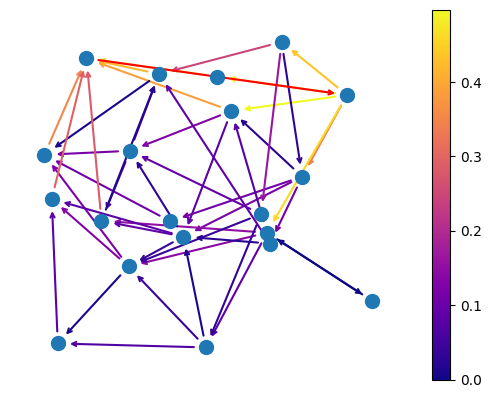

In [90]:
solved_random = solution_graphs[0]
util.draw_current(solved_random[0].copy(), solved_random[1], nx.kamada_kawai_layout(solved_random[0], weight=None, scale=5), lables=False, edge_width=1.5)

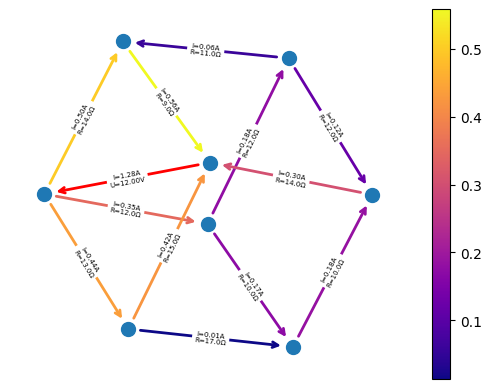

In [91]:
solved_cube = solution_graphs[1]
util.draw_current(solved_cube[0], solved_cube[1])

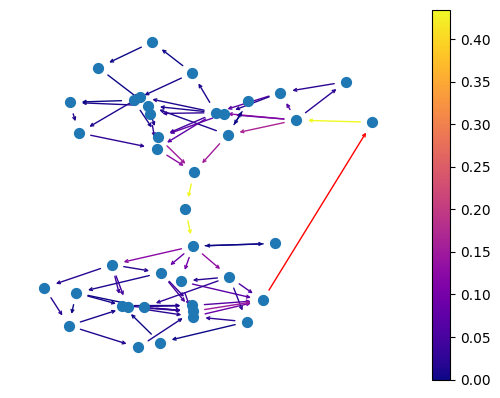

In [92]:
#TODO: solved_world, solved_grid
solved_brige = solution_graphs[2]
util.draw_current(solved_brige[0].copy(), solved_brige[1], nx.kamada_kawai_layout(solved_brige[0], weight=None, scale=5), lables=False, edge_width=1, nodesize=50)

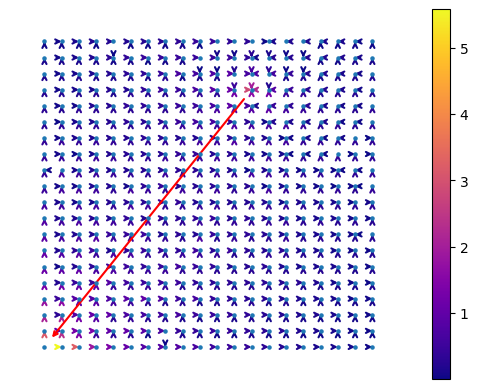

In [93]:
solved_grid = solution_graphs[3]
util.draw_current(solved_grid[0].copy(), solved_grid[1], grid_pos, lables=False, nodesize=5, edge_width=1.5)

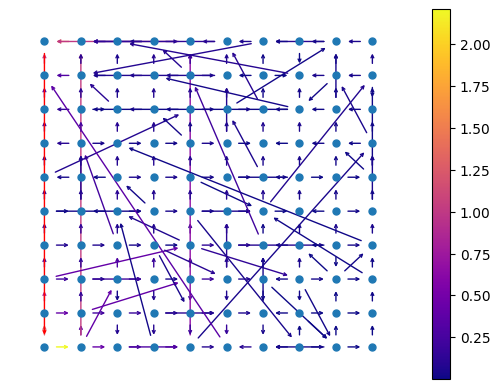

In [94]:
solved_world = solution_graphs[4]
util.draw_current(solved_world[0].copy(), solved_world[1], small_pos, lables=False, nodesize=25, edge_width=1)

#### Ładowanie siatki z pliku
Plik musi być listą krawędzi sformatowaną w następujący sposób, krawędzie są nieskierowane:

<pierwszy wierchołek>, <drugi wierzchołek>, <opór na tym oporniku>

Aby załadować siatkę z pliku należy podac nazwę pliku do fukcji `parse_file`.

In [5]:
graph = util.parse_file("test.txt")
desc = {
    "source": 5,
    "tap": 0,
    "voltage": 12,
    "current": None
}

Succes


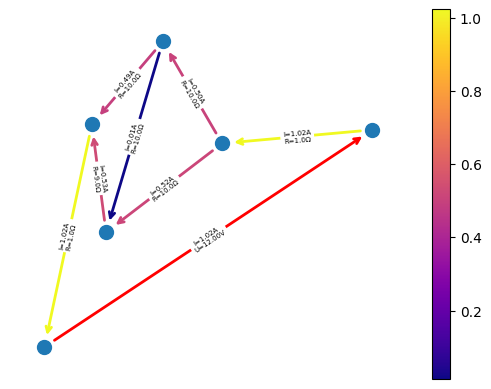

In [14]:
sol, i = solve_nodal_analisis(graph, desc["source"], desc["tap"], desc["voltage"])
desc["current"] = i
result = util.create_graf_from_solution(graph, sol)
a = util.validate_solution(result.copy(), desc, True)
util.draw_current(result.copy(), desc, nx.spring_layout(result))